# GridPath Workshop (UCSB)

Initialization

In [1]:
import os
import sys
import pandas as pd

# Print the current working directory. The result should end with state_model
software_dir = os.getcwd()
os.chdir("..")
print(software_dir)

C:\Users\brenguest\Desktop\state_model\gridpath-workshop-ucsb


In [2]:
#Setting this as the primary directory for all future use
# This is be the main folder where all files are created and stored in. 
directory = os.getcwd()
print(directory)

C:\Users\brenguest\Desktop\state_model


In [3]:
# Defining the database directory - where the database file will be created and stored. 
db_dir = f"{directory}/db"

# Defining CSV inputs directory - where the state level input files are stored. 
csv_dir = f"{directory}/input_csvs_gridpath"

#Defining scenario folder location
scen_dir = f"{directory}/scenarios"

# GridPath: Capacity Expansion
The following section is for running a capacity expansion model in GridPath.

## User edit section
Add the folder name with input csvs and provide a name for this database.

In [4]:
# Speciific  model for this run.
# Add the name of the specific mode folder file by replacing the worth between " " 
input_csvs_gridpath = "TN_7-2050-12_simple"

# Add your database name below between "" or leave blank to use input_csvs_gridpath as database name
db_name = ""
db_name = db_name if db_name else input_csvs_gridpath
print(f"Database name is set to: {db_name}")

Database name is set to: TN_7-2050-12_simple


### Creating database, importing state inputs and importing scenarios to the database for modeling

In [5]:
!python {directory}/gridpath/db/create_database.py --database {db_dir}/{db_name}.db
!python {directory}/gridpath/db/utilities/port_csvs_to_db.py --database {db_dir}/{db_name}.db --csv_location {csv_dir}/{input_csvs_gridpath}
!python {directory}/gridpath/db/utilities/scenario.py --database {db_dir}/{db_name}.db --csv_path {csv_dir}/{input_csvs_gridpath}/scenarios.csv

Importing data for subscenario solver_options_id, table options_solver from C:\Users\brenguest\Desktop\state_model/input_csvs_gridpath/TN_7-2050-12_simple\solver...
...importing CSV 1_glpk.csv
   ...importing data from 1_glpk.csv
...importing CSV 2_cbc.csv
   ...importing data from 2_cbc.csv
...importing CSV 3_cplex_high_mipgap.csv
   ...importing data from 3_cplex_high_mipgap.csv
...importing CSV 4_gurobi_4th_high_mipgap.csv
   ...importing data from 4_gurobi_4th_high_mipgap.csv
...importing CSV 5_ipopt.csv
   ...importing data from 5_ipopt.csv
...importing CSV 6_highs.csv
   ...importing data from 6_highs.csv
...importing CSV 7_cplex.csv
   ...importing data from 7_cplex.csv
Importing data for subscenario temporal_scenario_id, table temporal from C:\Users\brenguest\Desktop\state_model/input_csvs_gridpath/TN_7-2050-12_simple\temporal...
...importing data from directory C:\Users\brenguest\Desktop\state_model/input_csvs_gridpath/TN_7-2050-12_simple\temporal\1_7periods_2020-2050
   ...im

In [6]:
# This will print out all possible scenarios available
scenario_csv = pd.read_csv(f"{csv_dir}/{input_csvs_gridpath}/scenarios.csv")
column_names = scenario_csv.columns[1:]

# Print scenario names
print("Available scenarios:")
for name in column_names:
    print(name)

Available scenarios:
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple


## Select scenarios from the list above and add to the `selected_scenario` below before running.

### User Edit Section

In [7]:
# Add or remove scenarios from above to the list below:
scen_list = ["VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple",
             "VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple",
             "VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple"]

### Running selected scenarios

In [11]:
for selected_scenario in scen_list:
    !python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --solver cbc --solver_executable {directory}\solver\CBC\bin\cbc.exe --scenario_location {scen_dir}

#For Mac user, run below:
#for selected_scenario in scen_list:
#    !python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple end to end
Process ID is 3220
End-to-end run started on 2024-11-05 17:11:15.794074
Getting inputs... (connected to database C:\Users\brenguest\Desktop\state_model/db/TN_7-2050-12_simple.db)

Running optimization for scenario scenarios\VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
Building model...
Loading data...
Creating problem instance...
Solving...
Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Mar  8 2020 

command line - C:\Users\brenguest\Desktop\state_model\solver\CBC\bin\cbc.exe -printingOptions all -import C:\Users\BRENGU~1\AppData\Local\Temp\tmp7vq9vvov.pyomo.lp -stat=1 -solve -solu C:\Users\BRENGU~1\AppData\Local\Temp\tmp7vq9vvov.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals 

C:\Users\brenguest\anaconda3\envs\gp-workshop\lib\site-packages\gridpath\project\operations\power.py:180: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  operational_results_df = pd.read_csv(
C:\Users\brenguest\anaconda3\envs\gp-workshop\lib\site-packages\gridpath\auxiliary\db_interface.py:225: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(results_directory, f"{which_results}.csv"))


^C
^C


C:\Users\brenguest\anaconda3\envs\gp-workshop\lib\site-packages\gridpath\project\operations\power.py:180: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  operational_results_df = pd.read_csv(
C:\Users\brenguest\anaconda3\envs\gp-workshop\lib\site-packages\gridpath\auxiliary\db_interface.py:225: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(results_directory, f"{which_results}.csv"))


Running scenario VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple end to end
Process ID is 16520
End-to-end run started on 2024-11-05 17:15:38.139526
Getting inputs... (connected to database C:\Users\brenguest\Desktop\state_model/db/TN_7-2050-12_simple.db)

Running optimization for scenario scenarios\VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
Building model...
Loading data...
Creating problem instance...
Solving...
Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Mar  8 2020 

command line - C:\Users\brenguest\Desktop\state_model\solver\CBC\bin\cbc.exe -printingOptions all -import C:\Users\BRENGU~1\AppData\Local\Temp\tmpy9yhp1fc.pyomo.lp -stat=1 -solve -solu C:\Users\BRENGU~1\AppData\Local\Temp\tmpy9yhp1fc.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals

C:\Users\brenguest\anaconda3\envs\gp-workshop\lib\site-packages\gridpath\project\operations\power.py:180: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  operational_results_df = pd.read_csv(
C:\Users\brenguest\anaconda3\envs\gp-workshop\lib\site-packages\gridpath\auxiliary\db_interface.py:225: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(results_directory, f"{which_results}.csv"))


# Visualization: Capacity Expansion
The following section is for visualizing the results from the GridPath Capacity Expansion model above.

In [13]:
# Checking the directory is correct - should be state_model folder
os.chdir(software_dir)
print(os.getcwd())

C:\Users\brenguest\Desktop\state_model\gridpath-workshop-ucsb


In [14]:
# loading packages and setting results folder
from loading_utils import * 
from plotting_utils import * 
from processing_utils import *
from pdf_report import * 

path_to_scenarios = f"{directory}/scenarios"
print(path_to_scenarios)

C:\Users\brenguest\Desktop\state_model/scenarios


Loading necessary functions for the zones, scenarios labels `<scenario_labels.csv>` and technology colors `<technology_labels.csv>` to plot the graph for new and existing capacity

In [15]:
scen_labels_     = pd.read_csv(directory + '/input_csvs_plotting/scenario_labels_capex.csv') 
tech_labels_     = pd.read_csv(directory + '/input_csvs_plotting/technology_labels_capex.csv') 
dispatch_labels_ = pd.read_csv(directory + '/input_csvs_plotting/dispatch_labels_capex.csv') 

Load new and existing capacity across different scenarios, grouping the capacity by technology.

In [16]:
capacity_         = _load_capacity(scen_labels_, path_to_scenarios, gp_model = 'capex')
grouped_capacity_ = _group_capacity_technologies(capacity_, tech_labels_)
grouped_capacity_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Technology,Zone,Status,Power,Energy
0,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2020,Battery,Tamil_Nadu,new,0.000,0.0
1,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2020,Battery,Tamil_Nadu,existing,0.000,0.0
2,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2020,Coal,Tamil_Nadu,new,0.000,0.0
3,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2020,Coal,Tamil_Nadu,existing,13911.187,0.0
4,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2020,Curtailment,Tamil_Nadu,new,0.000,0.0
...,...,...,...,...,...,...,...
283,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Solar,Tamil_Nadu,existing,3915.000,0.0
284,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tx_Losses,Tamil_Nadu,new,0.000,0.0
285,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tx_Losses,Tamil_Nadu,existing,0.000,0.0
286,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Wind,Tamil_Nadu,new,0.000,0.0


Plotting the new and existing capacity. Add title name for the plot.

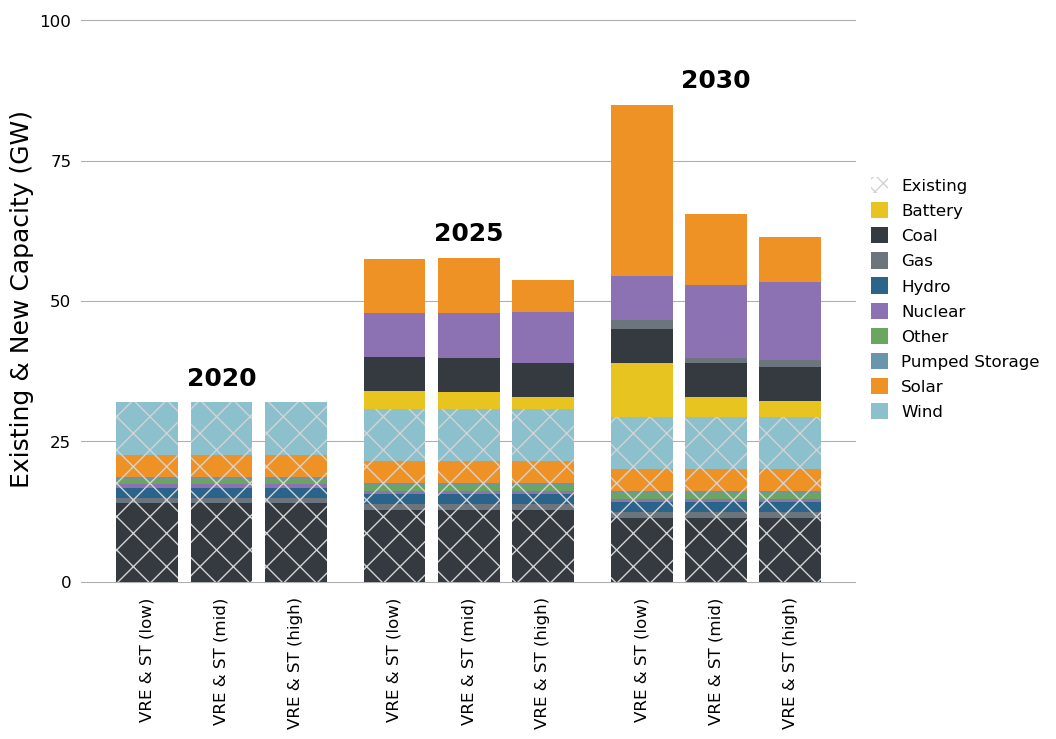

In [17]:
_plot_new_and_existing_capacity(grouped_capacity_, scen_labels_, tech_labels_,
                                units        = 1e3,
                                units_label  = 'Existing & New Capacity (GW)',
                                legend       = True,
                                save         = True,
                                y_grid_inc   = 25,
                                title        = '',
                                file_name    = directory + r'/plots/group_installed_capacity_capex.png')

Energy dispatch by scenarios, zone and date

In [18]:
dispatch_         = _load_energy_dispatch(scen_labels_, path_to_scenarios, gp_model = 'capex')
grouped_dispatch_ = _group_dispatch_technologies(dispatch_, tech_labels_)
grouped_dispatch_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Technology,Zone,Energy
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Coal,Tamil_Nadu,5.826379e+07
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Gas,Tamil_Nadu,2.257936e+06
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Diesel,Tamil_Nadu,0.000000e+00
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Hydro,Tamil_Nadu,3.815683e+06
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Other,Tamil_Nadu,7.967328e+06
...,...,...,...,...,...
139,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Export,Tamil_Nadu,0.000000e+00
140,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Curtailment,Tamil_Nadu,0.000000e+00
141,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Tx_Losses,Tamil_Nadu,-3.524295e+05
142,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Import,Tamil_Nadu,5.034707e+06


Load energy dispatch 

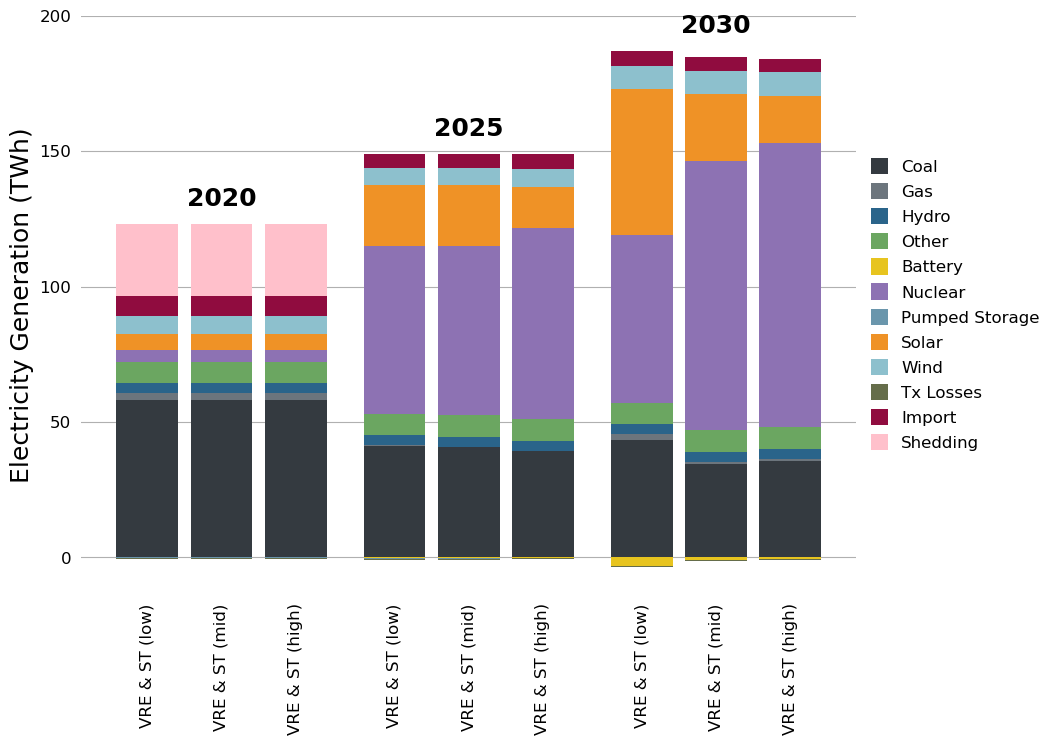

In [19]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_dispatch(grouped_dispatch_, scen_labels_,  tech_labels_, 
               units        = 1e6, 
               units_label  = r'Electricity Generation (TWh)',
               save         = True,
               legend       = True,
               y_grid_inc   = 50,
               title        = '',
               file_name    = directory + r'/plots/group_electricity_generation_capex.png')

In [20]:
ed_ = _processing_energy_dispatch(scen_labels_, path_to_scenarios, model = 'capex')
ed_ = _group_dispatch_technologies_by_zone_and_date_production(ed_, tech_labels_)

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


Plotting energy dispatch

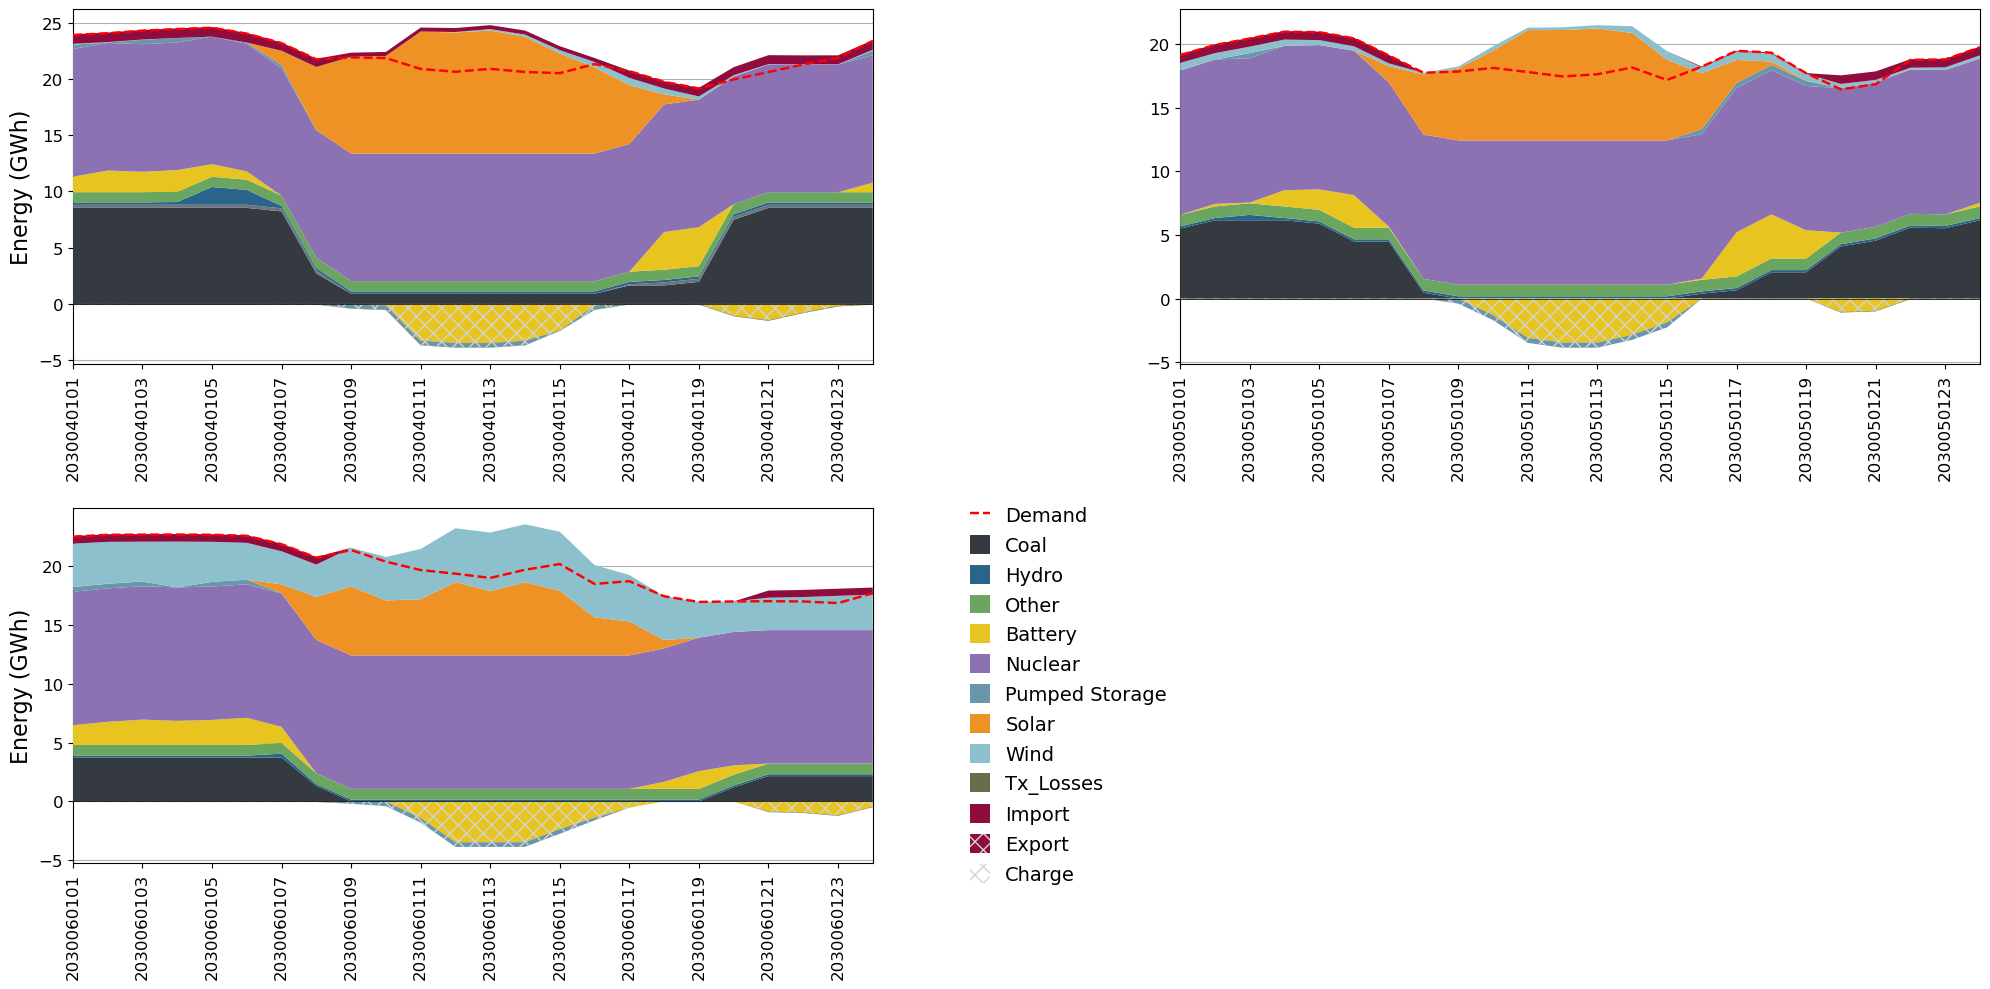

In [21]:
# Plot energy dispatch for a given day
_plot_zone_energy_dispatch_production(ed_, scen_labels_, tech_labels_, dispatch_labels_,
                                      save      = True,
                                      legend    = True,
                                      file_name = directory + r'/plots/energy_dispatch_capex.png')

Load Greenhouse Gas (GHG) emissions and load energy demand for different scenarios

In [22]:
emissions_, demand_ = _load_GHG_emissions(scen_labels_, path_to_scenarios, gp_model = 'capex')
emissions_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Technology,Zone,GHG
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Battery,Tamil_Nadu,0.000000e+00
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Biomass,Tamil_Nadu,0.000000e+00
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,CCGT,Tamil_Nadu,9.451721e+05
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,CT,Tamil_Nadu,0.000000e+00
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Hydro_Pumped,Tamil_Nadu,0.000000e+00
...,...,...,...,...,...
139,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,SolarPV_tilt,Tamil_Nadu,0.000000e+00
140,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Subcritical_Coal_Large,Tamil_Nadu,5.987638e+06
141,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Subcritical_Coal_Small,Tamil_Nadu,8.002638e+06
142,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Supercritical_Coal,Tamil_Nadu,2.016658e+07


Plot GHG emissions for different scenarios

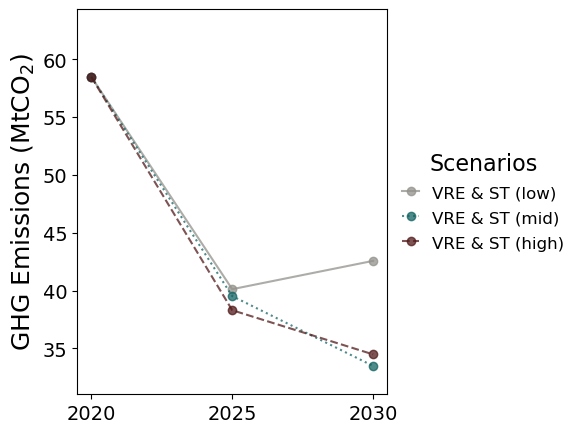

In [23]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions(emissions_, scen_labels_, 
                units      = 1e6,
                unit_label = r'GHG Emissions (MtCO$_2$)',
                save       = True,
                legend     = True,
                title      = '',
                file_name  = directory + r'/plots/GHG_emissions_capex.png')

Processing GHG emissions intensity for different scenarios

In [24]:
intesity_, demand_ = _GHG_emissions_intensity(emissions_, demand_)
intesity_

VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Zone,Period,GHG,Load,Intensity
0,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,Tamil_Nadu,2020,5.848026e+07,1.223677e+08,0.477906
1,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,Tamil_Nadu,2025,3.830730e+07,1.481464e+08,0.258577
2,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,Tamil_Nadu,2030,3.448629e+07,1.831572e+08,0.188288
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2020,5.848026e+07,1.223677e+08,0.477906
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2025,4.012537e+07,1.481464e+08,0.270849
5,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2030,4.257421e+07,1.831572e+08,0.232446
6,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2020,5.848026e+07,1.223677e+08,0.477906
7,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2025,3.952735e+07,1.481464e+08,0.266813
8,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2030,3.348380e+07,1.831572e+08,0.182815


Plot system Levelized Cost of Electricity (LCOE) for different scenarios

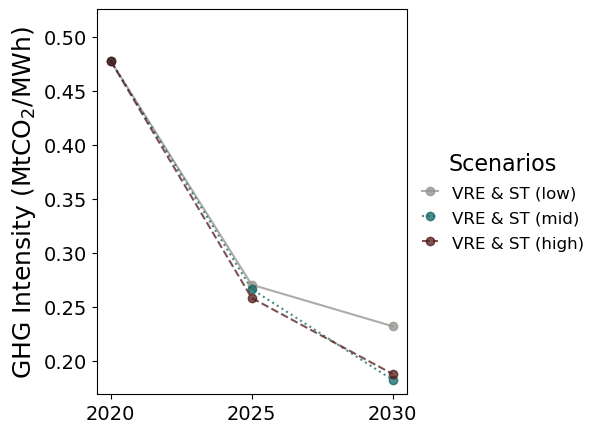

In [25]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions_intensity(intesity_, scen_labels_, 
                          unit_label = r'GHG Intensity (MtCO$_2$/MWh)',
                          save       = True,
                          legend     = True,
                          title      = '',
                          file_name  = directory + r'/plots/GHG_emissions_intensity_capex.png')

Load system cost data for different scenarios

In [26]:
system_cost_ = _load_system_cost(scen_labels_, path_to_scenarios, gp_model = 'capex')
system_cost_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Zone,Variable_Costs,Fix_Costs,Load,Tx_Costs,Cost,LCOE
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Tamil_Nadu,3401853012.4750657,3184222192.264765,1.223677e+08,0.0,6.586075e+09,53.822022
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2025,Tamil_Nadu,4249640068.9545074,6654368739.986953,1.481464e+08,0.0,1.090401e+10,73.602940
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tamil_Nadu,4584982570.4482,8245560622.583776,1.831572e+08,0.0,1.283054e+10,70.052069
3,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Tamil_Nadu,3401853012.504037,3184222192.264765,1.223677e+08,0.0,6.586075e+09,53.822022
4,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2025,Tamil_Nadu,4237260177.394766,6729573321.555292,1.481464e+08,0.0,1.096683e+10,74.027012
5,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tamil_Nadu,5147847520.162639,7951357423.960751,1.831572e+08,0.0,1.309920e+10,71.518905
6,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2020,Tamil_Nadu,3401853012.504037,3184222192.264765,1.223677e+08,0.0,6.586075e+09,53.822022
7,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2025,Tamil_Nadu,4382553786.613338,6713033275.958286,1.481464e+08,0.0,1.109559e+10,74.896109
8,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Re...,2030,Tamil_Nadu,5366794155.4447775,7786362790.005568,1.831572e+08,0.0,1.315316e+10,71.813472


Plot system Levelized Cost of Electricity (LCOE) for different scenarios

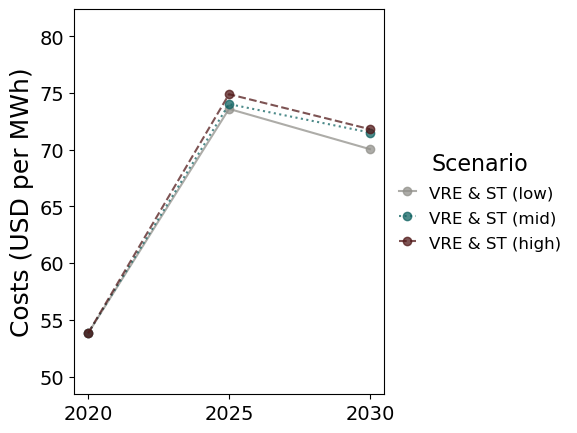

In [27]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_system_cost(system_cost_, scen_labels_, 
                  unit_label = r'Costs (USD per MWh)', 
                  save       = True, 
                  legend     = True,
                  title      = '', 
                  file_name  = directory + r'/plots/system_cost_capex.png')

In [28]:
# Replace with a specific scenario if needed, otherwise leave blank
scenario = 'VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple' 
# Replace with 'new' or existing' so only new capacity is shown, otherwise leave blank for new and existing
status = 'new' 
filtered_capacity_ = _filter_capacity(grouped_capacity_, scenario, status)
filtered_capacity_

Scenario      Technology  \
Period                     
0                Battery   
1                   Coal   
2            Curtailment   
3                 Diesel   
4                 Export   
5                    Gas   
6                  Hydro   
7               Hydrogen   
8                 Import   
9                Nuclear   
10                 Other   
11        Pumped Storage   
12              Shedding   
13                 Solar   
14             Tx_Losses   
15                  Wind   

Scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple  \
Period                                                                       2020   
0                                                       0.0                         
1                                                       0.0                         
2                                                       0.0                         
3                                                       0.0                         
4                                                       0.0                         
5                                                       0.0                         
6                                                       0.0                         
7                                                       0.0                         
8                                                       0.0                         
9                                                       0.0                         
10                                                      0.0                         
11                                                      0.0                         
12                                                      0.0                         
13                                                      0.0                         
14                                                      0.0                         
15                                                      0.0                         

Scenario                         
Period         2025        2030  
0         3068.5274   9654.6159  
1         6065.0000   6065.0000  
2            0.0000      0.0000  
3            0.0000      0.0000  
4            0.0000      0.0000  
5            0.0000   1484.2589  
6            0.0000      0.0000  
7            0.0000      0.0000  
8            0.0000      0.0000  
9         7912.5761   7912.5761  
10           0.0000      0.0000  
11           0.0000      0.0000  
12           0.0000      0.0000  
13        9617.8632  30438.6032  
14           0.0000      0.0000  
15           0.0000      0.0000

## PDF Report Output

In [29]:
# Option to add tables at the end of the PDF
add_tables = False  # Set to True to add tables; False to exclude tables

In [30]:
# Define file paths based on the existing directory variable
plot_details_csv = directory + r'/input_csvs_plotting/capex_plot_details.csv'
output_pdf_filename = directory + r'/Gridpath_Capacity_Expansion_Report.pdf' 

tables = [grouped_dispatch_, grouped_capacity_, emissions_, intesity_, system_cost_]  # List of DataFrames

# Generate the PDF
generate_pdf_report(directory, plot_details_csv, output_pdf_filename, tables=tables, add_tables=add_tables)
